<a href="https://colab.research.google.com/github/divy22x/codsoft/blob/main/amazon_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About the dataset**

This is Unprocessed dataset of Amazon Kindle Review for Sentiment Analysis.
It contains 12000 review text.
It contains each review text and the corresponding metadata in a row.

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
import scipy.stats as stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')
import re
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import math
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
df=pd.read_csv("/content/review.csv")
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'asin', 'helpful', 'rating', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary',
       'unixReviewTime'],
      dtype='object')

In [ ]:
df_copy.isnull().sum()

Unnamed: 0         0
Unnamed: 0.1       0
asin               0
helpful            0
rating             0
reviewText         0
reviewTime         0
reviewerID         0
reviewerName      38
summary            0
unixReviewTime     0
dtype: int64

In [ ]:
# selection columns!
data = data[['rating', 'reviewText']]
data.head()

,rating,reviewText
0,3,"Jace Rankin may be short, but he's nothing to ..."
1,5,Great short read. I didn't want to put it dow...
2,3,I'll start by saying this is the first of four...
3,3,Aggie is Angela Lansbury who carries pocketboo...
4,4,I did not expect this type of book to be in li...


In [ ]:
data.shape

(12000, 2)

In [ ]:
# check unique categories
data['reviewText'].value_counts()

Jace Rankin may be short, but he's nothing to mess with, as the man who was just hauled out of the saloon by the undertaker knows now. He's a famous bounty hunter in Oregon in the 1890s who, when he shot the man in the saloon, just finished a years long quest to avenge his sister's murder and is now trying to figure out what to do next. When the snotty-nosed farm boy he just rescued from a gang of bullies offers him money to kill a man who forced him off his ranch, he reluctantly agrees to bring the man to justice, but not to kill him outright. But, first he needs to tell his sister's widower the news.Kyla "Kyle" Springer Bailey has been riding the trails and sleeping on the ground for the past month while trying to find Jace. She wants revenge on the man who killed her husband and took her ranch, amongst other crimes, and she's not so keen on the detour Jace wants to take. But she realizes she's out of options, so she hides behind her boy persona as best she can and tries to keep pace

In [ ]:
# if rating is above 3 we will consider it as 1 else 0.
data["rating"] = data["rating"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1

Cleaning Text

In [ ]:
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# .lower() - convert all strings to lowercase
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# Apply all the lambda functions wrote previously through .map on the comments column
df_copy['review'] = df_copy['reviewText'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [ ]:
df_copy['reviewText']

0        Jace Rankin may be short, but he's nothing to ...
1        Great short read.  I didn't want to put it dow...
2        I'll start by saying this is the first of four...
3        Aggie is Angela Lansbury who carries pocketboo...
4        I did not expect this type of book to be in li...
                               ...                        
11995    Valentine cupid is a vampire- Jena and Ian ano...
11996    I have read all seven books in this series. Ap...
11997    This book really just wasn't my cuppa.  The si...
11998    tried to use it to charge my kindle, it didn't...
11999    Taking Instruction is a look into the often hi...
Name: reviewText, Length: 12000, dtype: object

**stop word**

In [ ]:
df_copy['review'] = df_copy['review'].apply(lambda x: ' '.join([corpus for corpus in x.split() if corpus not in stopwords]))

In [ ]:
df_copy['reviewText']

0        Jace Rankin may be short, but he's nothing to ...
1        Great short read.  I didn't want to put it dow...
2        I'll start by saying this is the first of four...
3        Aggie is Angela Lansbury who carries pocketboo...
4        I did not expect this type of book to be in li...
                               ...                        
11995    Valentine cupid is a vampire- Jena and Ian ano...
11996    I have read all seven books in this series. Ap...
11997    This book really just wasn't my cuppa.  The si...
11998    tried to use it to charge my kindle, it didn't...
11999    Taking Instruction is a look into the often hi...
Name: reviewText, Length: 12000, dtype: object

**stemming**

In [ ]:
stemmer = nltk.stem.SnowballStemmer('english')
df_copy.stem_review = df_copy.review.apply(lambda x: " ".join(stemmer.stem(x) for x in x.split()))
df_copy.stem_review

0        jace rankin may short noth mess man haul saloo...
1        great short read want put read one sit sex sce...
2        start say first four book expect conclud cente...
3        aggi angela lansburi carri pocketbook instead ...
4          expect type book librari pleas find price right
                               ...                        
11995    valentin cupid vampir jena ian anoth vampir fi...
11996    read seven book seri apocalypt adventur one fa...
11997    book realli cuppa situat man captur woman work...
11998    tri use charg kindl even regist charg complet ...
11999    take instruct look often hidden world sexual b...
Name: review, Length: 12000, dtype: object

**word cloud**

In [ ]:
df_copy.loc[df_copy['rating'] == 3,'score'] = 'Neutral'
df_copy.loc[df_copy['rating'] < 3,'score'] = 'Negative'
df_copy.loc[df_copy['rating'] > 3,'score'] = 'Positive'

In [ ]:
Neutral = df_copy.loc[df_copy['score'] == 'Neutral']
Positive = df_copy.loc[df_copy['score'] == 'Positive']
Negative = df_copy.loc[df_copy['score'] == 'Negative']

Neutral

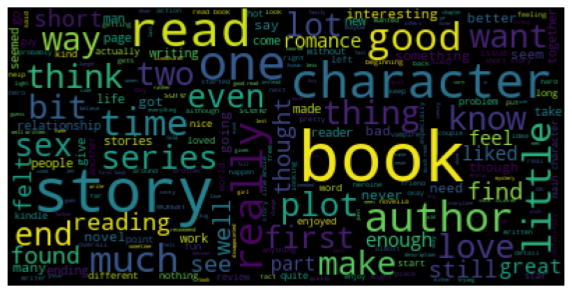

In [ ]:
text = ' '.join(Neutral['review']).lower()

def wc(data,bgcolor,title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = bgcolor, max_words = 10000,  max_font_size = 50)
    wc.generate(text)
    plt.imshow(wc)
    plt.axis('off')

wc(text,'black','Most Used Words')

Positive

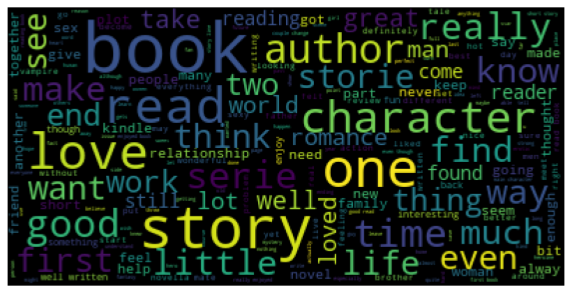

In [ ]:
text = ' '.join(Positive['review']).lower()

def wc(data,bgcolor,title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = bgcolor, max_words = 10000,  max_font_size = 50)
    wc.generate(text)
    plt.imshow(wc)
    plt.axis('off')

wc(text,'black','Most Used Words')

Negative

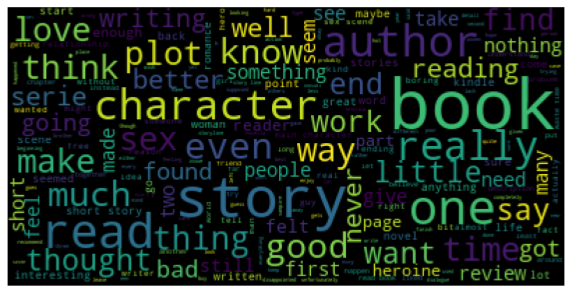

In [ ]:
text = ' '.join(Negative['review']).lower()

def wc(data,bgcolor,title):
    plt.figure(figsize = (10,100))
    wc = WordCloud(background_color = bgcolor, max_words = 10000,  max_font_size = 50)
    wc.generate(text)
    plt.imshow(wc)
    plt.axis('off')

wc(text,'black','Most Used Words')

**N-gram**

In [ ]:
def get_top_nwords(x, n, i):
    vec = CountVectorizer(ngram_range=(i,i)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True)
    return words_freq[:n]

In [ ]:
words = get_top_nwords(df_copy['review'], 20, 1)

df_bi = pd.DataFrame(words, columns=['Unigram', 'Frequency'])
df_bi = df_bi.set_index('Unigram')
fig = px.bar(df_bi,title="Top Frequency")
fig.show()

In [ ]:
words = get_top_nwords(df_copy['review'], 20, 2)

df_bi = pd.DataFrame(words, columns=['bi-gram', 'Frequency'])
df_bi = df_bi.set_index('bi-gram')
fig = px.bar(df_bi,title="Top Frequency")
fig.show()

In [ ]:
words = get_top_nwords(df_copy['review'], 20, 3)

df_bi = pd.DataFrame(words, columns=['Trigram', 'Frequency'])
df_bi = df_bi.set_index('Trigram')
fig = px.bar(df_bi,title="Top Frequency")
fig.show()

**ordinal encoding**

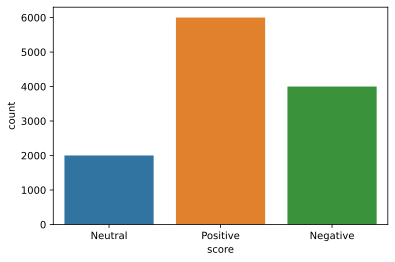

In [ ]:
sns.countplot(x="score", data=df_copy)


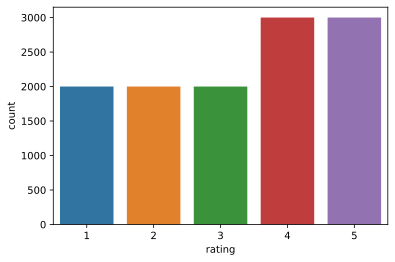

In [ ]:
sns.countplot(x="rating", data=df_copy)